# Cleaning and preliminary analysis

In this notebook, we clean the data and impute if necesary. Then, we do a preliminary analysis of the data.

In [1]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

# Change path here if necessary
DATA_DIR = '../data/'
FIGURE_DIR = '../report/figures/'
SEED = 3795

## Data cleaning and imputation

We can see in the following two tables that there is no missing data. Moreover, some variables are useless for our analysis, like the identifications of the measurement tools. The interesting variables are:

- alpha: Right Ascension angle (at J2000 epoch);
- delta: Declination angle (at J2000 epoch);
- u: Ultraviolet filter in the photometric system;
- g: Green filter in the photometric system;
- r: Red filter in the photometric system;
- i: Near Infrared filter in the photometric system;
- z: Infrared filter in the photometric system;
- class: Object class (galaxy, star or quasar object), and;
- redshift: Redshift value based on the increase in wavelength.

We can remove the others from our Pandas dataframe. Excepting the labels (class), every interesting variables are of types float64.

In [2]:
data = pd.read_csv(DATA_DIR + 'star_classification.csv')
data.head()

obj_ID       alpha      delta         u         g         r  \
0  1.237661e+18  135.689107  32.494632  23.87882  22.27530  20.39501   
1  1.237665e+18  144.826101  31.274185  24.77759  22.83188  22.58444   
2  1.237661e+18  142.188790  35.582444  25.26307  22.66389  20.60976   
3  1.237663e+18  338.741038  -0.402828  22.13682  23.77656  21.61162   
4  1.237680e+18  345.282593  21.183866  19.43718  17.58028  16.49747   

          i         z  run_ID  rerun_ID  cam_col  field_ID   spec_obj_ID  \
0  19.16573  18.79371    3606       301        2        79  6.543777e+18   
1  21.16812  21.61427    4518       301        5       119  1.176014e+19   
2  19.34857  18.94827    3606       301        2       120  5.152200e+18   
3  20.50454  19.25010    4192       301        3       214  1.030107e+19   
4  15.97711  15.54461    8102       301        3       137  6.891865e+18   

    class  redshift  plate    MJD  fiber_ID  
0  GALAXY  0.634794   5812  56354       171  
1  GALAXY  0.779136  10445  58158       427  
2  GALAXY  0.644195   4576  55592       299  
3  GALAXY  0.932346   9149  58039       775  
4  GALAXY  0.116123   6121  56187       842

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [4]:
data.drop(
    columns=['obj_ID', 'run_ID', 'rerun_ID', 'cam_col', 'field_ID',
             'spec_obj_ID', 'plate', 'MJD', 'fiber_ID'],
    inplace=True
)

We will seperate our dataset in two: a train dataset and a test dataset and save it into Numpy files.

In [5]:
X = data.drop(columns=['class']).to_numpy(dtype=np.float64)
y = data['class'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=SEED)
np.save(DATA_DIR + 'X_train.npy', X_train)
np.save(DATA_DIR + 'y_train.npy', y_train, allow_pickle=True)
np.save(DATA_DIR + 'X_test.npy', X_test)
np.save(DATA_DIR + 'y_test.npy', y_test, allow_pickle=True)

## Preliminary analysis

With the figure "Count of class", we see that we may face a problem of imbalance dataset. If needed, will use different data augmentation techniques.

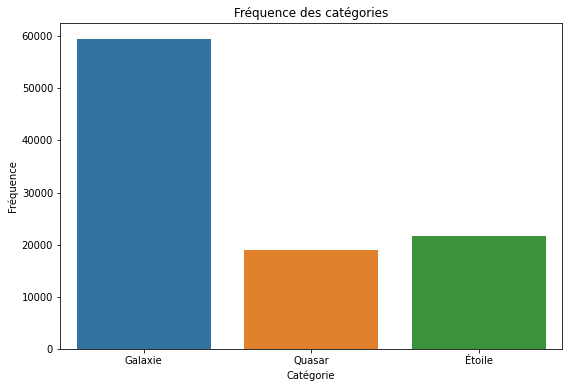

In [6]:
plt.figure(figsize=(9, 6))
sns.countplot(x=data['class'].replace({'GALAXY': 'Galaxie', 'QSO': 'Quasar', 'STAR': 'Étoile'}))
plt.xlabel('Catégorie')
plt.ylabel('Fréquence')
plt.title('Fréquence des catégories')
plt.xticks()
plt.savefig(FIGURE_DIR + 'count_of_class.png', dpi=300)
plt.show()

## Preprocessing of data

In [32]:
data.groupby('class').describe().T.style.background_gradient()

We can see that the variable "redshift" seperates the classes pretty well.

**An important point to notice is that there exists outliers within the "star" class.**

In [8]:
data[(data['class'] == 'STAR') & (data['z'] == -9999)]

alpha     delta       u       g        r         i       z class  \
79543  224.006526 -0.624304 -9999.0 -9999.0  18.1656  18.01675 -9999.0  STAR   

       redshift  
79543  0.000089

In [9]:
ddata = data.drop(index=79543)
ddata[(ddata['class'] == 'STAR') & (ddata['g'] == -9999)]

Empty DataFrame
Columns: [alpha, delta, u, g, r, i, z, class, redshift]
Index: []

In [10]:
ddata[(ddata['class'] == 'STAR') & (ddata['u'] == -9999)]

Empty DataFrame
Columns: [alpha, delta, u, g, r, i, z, class, redshift]
Index: []

In [33]:
ddata[ddata['class'] == 'GALAXY'].describe().style.to_latex(
    FIGURE_DIR + 'galaxy_describe_latex.txt',
)
ddata[ddata['class'] == 'QSO'].describe().style.to_latex(
    FIGURE_DIR + 'quasar_describe_latex.txt'
)
ddata[ddata['class'] == 'STAR'].describe().style.to_latex(
    FIGURE_DIR + 'star_describe_latex.txt'
)
ddata.groupby('class').describe().T.style.background_gradient()

It seems to be the only outlier.

In [27]:
ddata.groupby('class').corr().style.background_gradient(cmap='coolwarm').to_latex(
    FIGURE_DIR + 'corr_classes_latex.txt',
    convert_css=True, hrules=True, clines='all;data'
)
ddata.groupby('class').corr().style.background_gradient(cmap='coolwarm')

In the classes "galaxy" and "quasar", there are multiple variables that are very correlated between each other. Since multiple variables express the same information, we may want apply the PCA.

In [28]:
np.linalg.cond(ddata.drop(columns=['class']).to_numpy())

958.2108941462419

We can see that the condition number is very high, which gives us a tip on how the observations are correlated.

<Figure size 432x288 with 0 Axes>

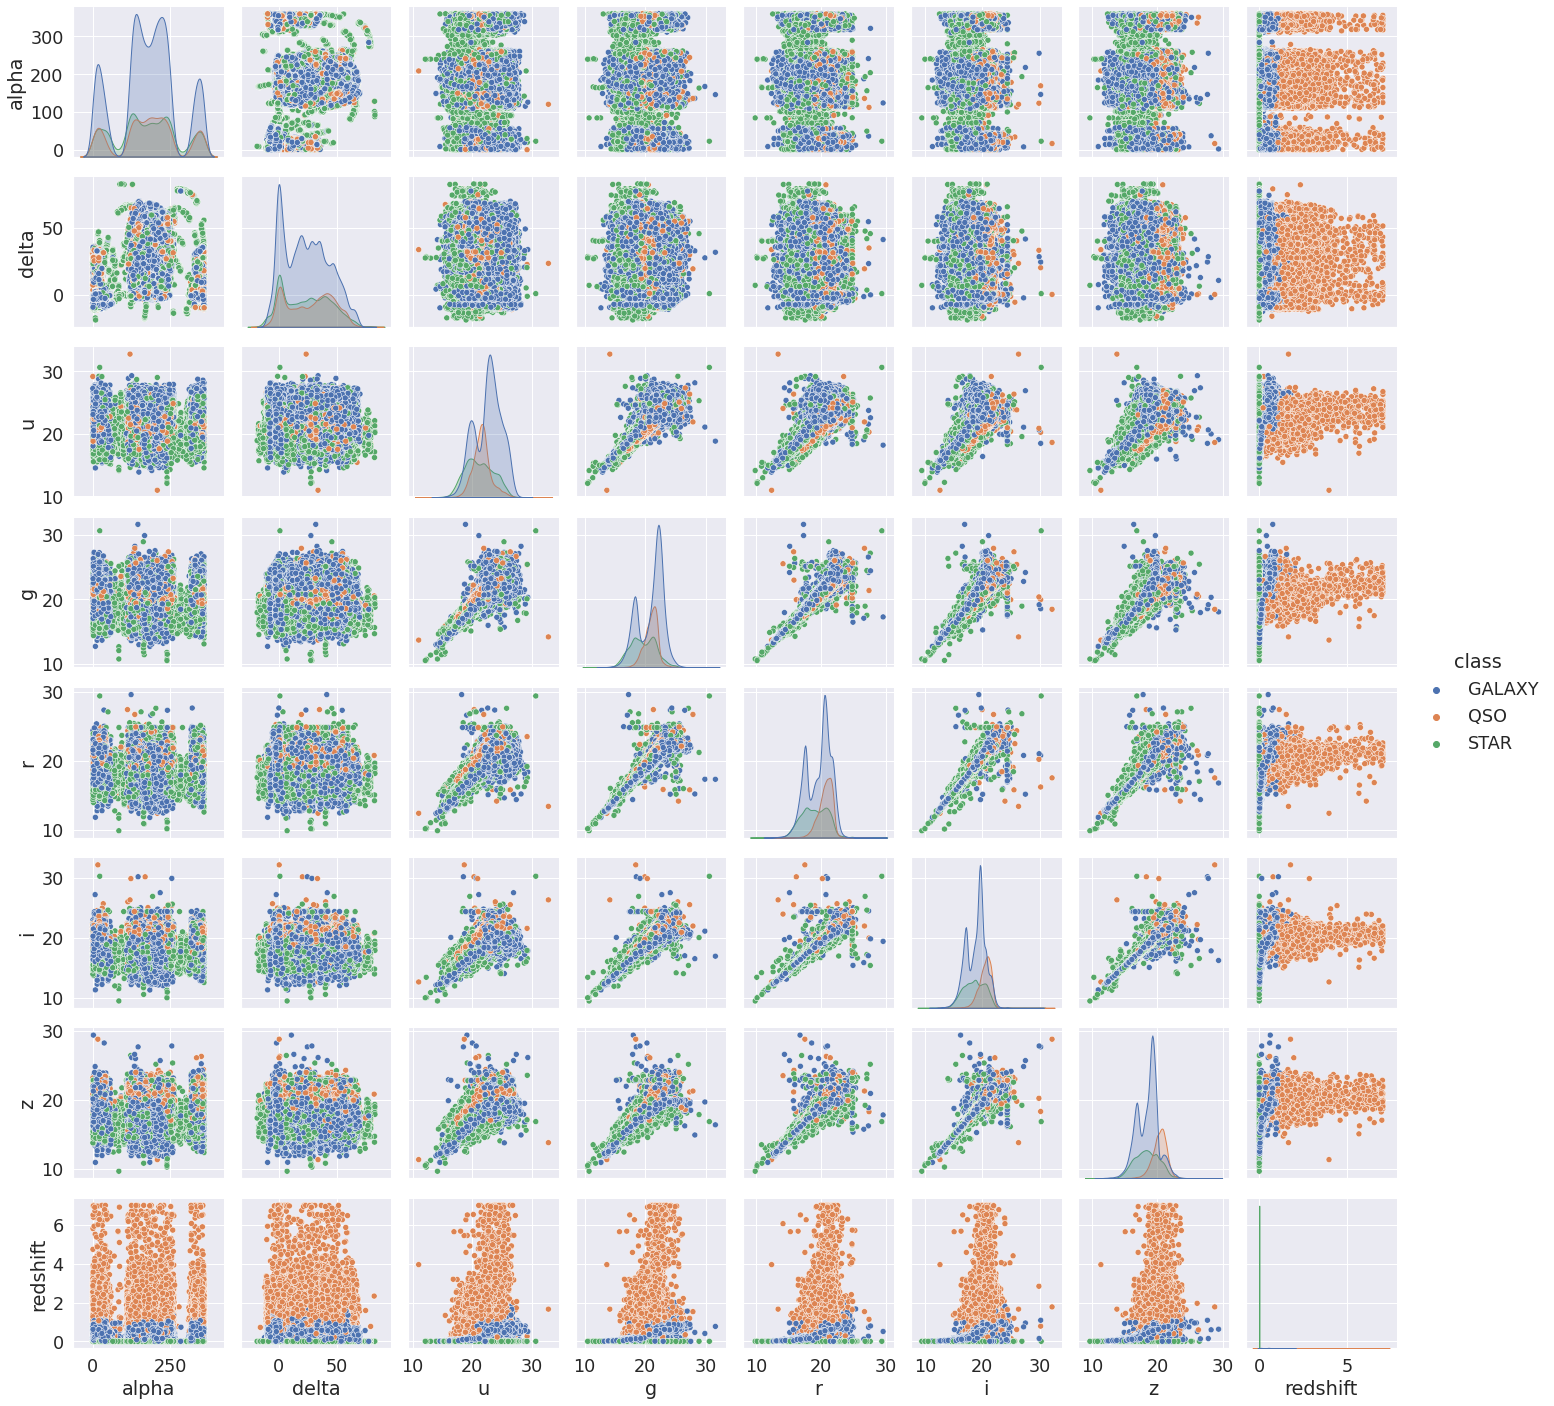

In [30]:
plt.figure()
sns.set(font_scale=1.6)
sns.pairplot(ddata, hue='class')
plt.savefig(FIGURE_DIR + 'distribution_variables.png', dpi=300)
plt.show()

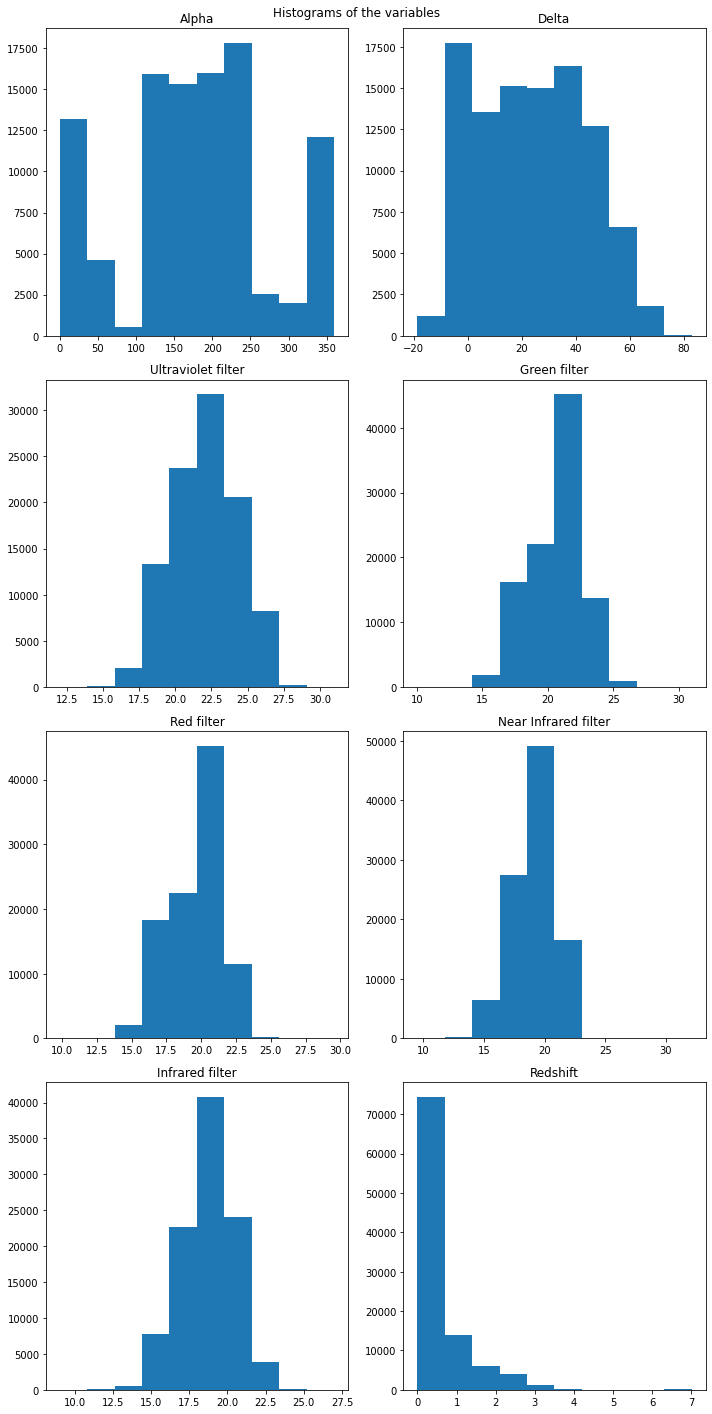

In [13]:
fig, ax = plt.subplots(4, 2, figsize=(10, 20))
fig.suptitle('Histograms of the variables')
ax[0, 0].hist(data['alpha'])
ax[0, 0].set_title('Alpha')
ax[0, 1].hist(data['delta'])
ax[0, 1].set_title('Delta')
ax[1, 0].hist(data['u'], range=[12, 31])
ax[1, 0].set_title('Ultraviolet filter')
ax[1, 1].hist(data['g'], range=[10, 31])
ax[1, 1].set_title('Green filter')
ax[2, 0].hist(data['r'])
ax[2, 0].set_title('Red filter')
ax[2, 1].hist(data['i'])
ax[2, 1].set_title('Near Infrared filter')
ax[3, 0].hist(data['z'], range=[9, 27])
ax[3, 0].set_title('Infrared filter')
ax[3, 1].hist(data['redshift'])
ax[3, 1].set_title('Redshift')
fig.tight_layout()
plt.savefig(FIGURE_DIR + 'histograms_of_variables.png')

Almost every variables distribution seem to follow a Gaussian.